In [3]:
install.packages('RCurl', repos='http://cran.us.r-project.org')
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))

Warning message:
“dependency ‘RCurl’ is not available”Warning message in install.packages("h2o", type = "source", repos = (c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R"))):
“installation of package ‘h2o’ had non-zero exit status”Updating HTML index of packages in '.Library'
Warning message in file.create(f.tg):
“cannot create file '/opt/conda/lib/R/doc/html/packages.html', reason 'Permission denied'”Warning message in make.packages.html(.Library):
“cannot update HTML package index”

In [5]:
library(h2o)
localH2O = h2o.init()


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpR94kiO/h2o_jovyan_started_from_r.out
    /tmp/RtmpR94kiO/h2o_jovyan_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 701 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.22.1.6 
    H2O cluster version age:    10 days  
    H2O cluster name:           H2O_started_from_R_jovyan_scp467 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   26.67 GB 
    H2O cluster total cores:    56 
    H2O cluster allowed cores:  56 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, 

In [6]:
#http://docs.h2o.ai/h2o-tutorials/latest-stable/tutorials/deeplearning/index.html
#https://datascienceplus.com/how-do-neural-nets-learn-a-step-by-step-explanation-using-the-h2o-deep-learning-algorithm/
#https://www.kaggle.com/blastchar/telco-customer-churn

In [ ]:
#devtools::install_github("hadley/tidyverse")


In [21]:
library(tidyverse)
library(readr)
library(h2o)
require(dplyr)


Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [11]:
telco_data <- read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


Parsed with column specification:
cols(
  .default = col_character(),
  SeniorCitizen = col_integer(),
  tenure = col_integer(),
  MonthlyCharges = col_double(),
  TotalCharges = col_double()
)
See spec(...) for full column specifications.


In [13]:
head(telco_data)
dim(telco_data)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


[1] 7043   21

In [27]:
str(telco_data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ 

In [22]:
hf <- telco_data %>%
  mutate_if(is.character, as.factor) %>%
  as.h2o

  |======================================================================| 100%


In [23]:
hf_X <- colnames(telco_data)[2:20]
hf_X

[1] "gender"           "SeniorCitizen"    "Partner"          "Dependents"      
 [5] "tenure"           "PhoneService"     "MultipleLines"    "InternetService" 
 [9] "OnlineSecurity"   "OnlineBackup"     "DeviceProtection" "TechSupport"     
[13] "StreamingTV"      "StreamingMovies"  "Contract"         "PaperlessBilling"
[17] "PaymentMethod"    "MonthlyCharges"   "TotalCharges"

In [17]:
hf_y <- colnames(telco_data)[21]
hf_y

[1] "Churn"

In [26]:
str(hf)

Class 'H2OFrame' <environment: 0x557e19fc5750> 
 - attr(*, "op")= chr "Parse"
 - attr(*, "id")= chr "data.frame_sid_baa5_4"
 - attr(*, "eval")= logi FALSE
 - attr(*, "nrow")= int 7043
 - attr(*, "ncol")= int 21
 - attr(*, "types")=List of 21
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "real"
  ..$ : chr "real"
  ..$ : chr "enum"
 - attr(*, "data")='data.frame':	10 obs. of  21 variables:
  ..$ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535
  ..$ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2
  ..$ SeniorCitizen   : num  0 0 0 0 0 0 0 0 0 0
  ..$ Partner         : Factor w/ 2 levels "No"

In [36]:
splits <- h2o.splitFrame(hf, c(0.6,0.2), seed=1234)
train  <- h2o.assign(splits[[1]], "train.hex") # 60%
valid  <- h2o.assign(splits[[2]], "valid.hex") # 20%
test   <- h2o.assign(splits[[3]], "test.hex")  # 20%

In [37]:
dl_model <- h2o.deeplearning(x = hf_X,
                             y = hf_y,
                             training_frame = hf,
                            validation_frame=valid)

  |======================================================================| 100%


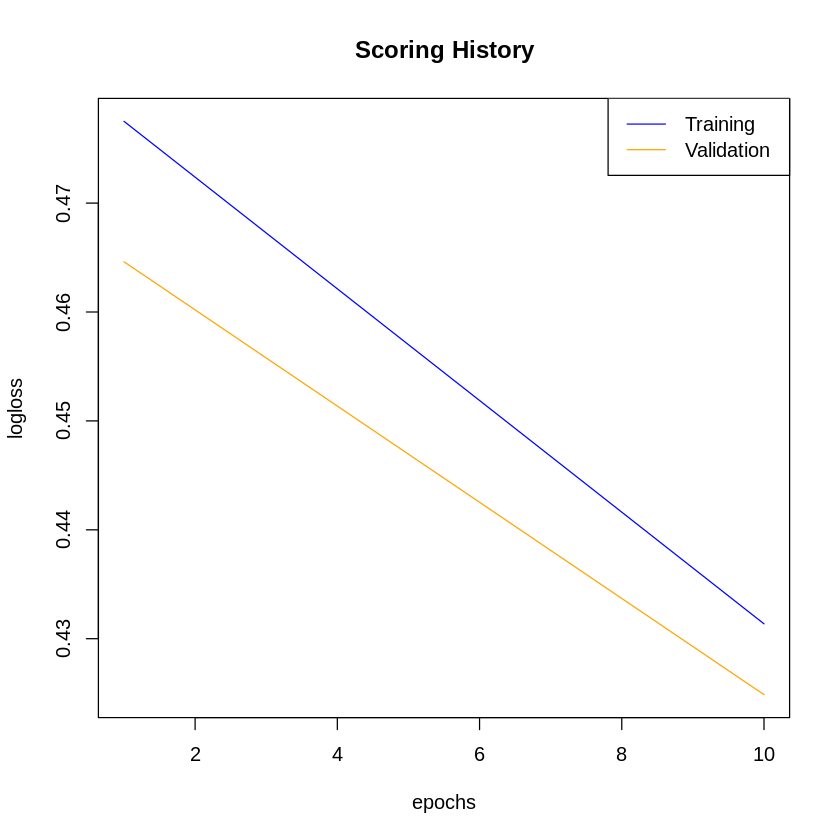

In [38]:
plot(dl_model)

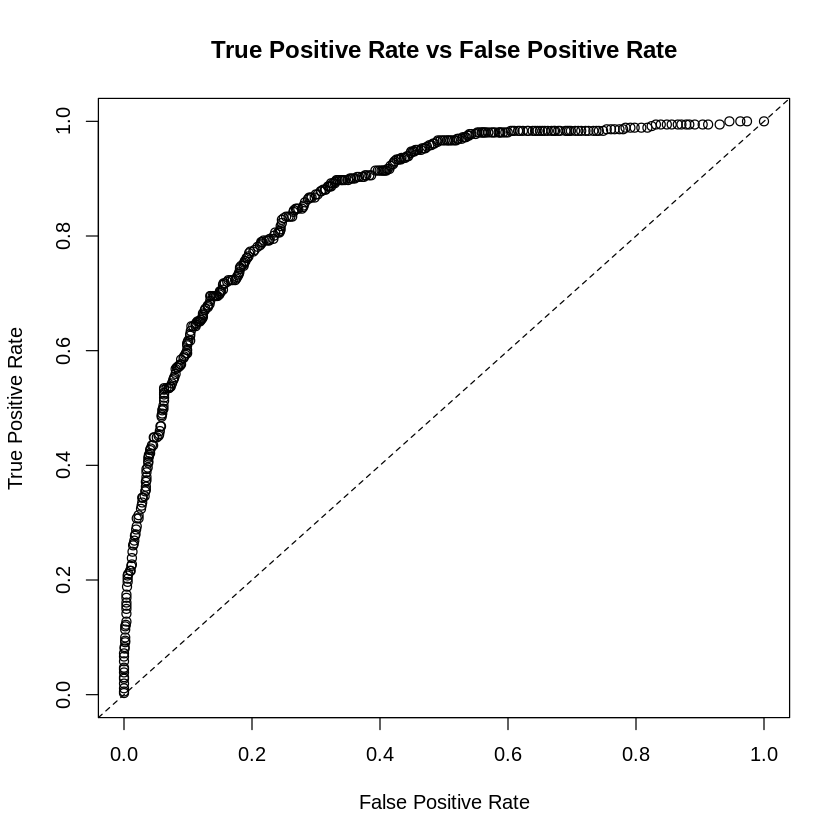

In [50]:
perf <- h2o.performance(dl_model, newdata = valid)
plot(perf)

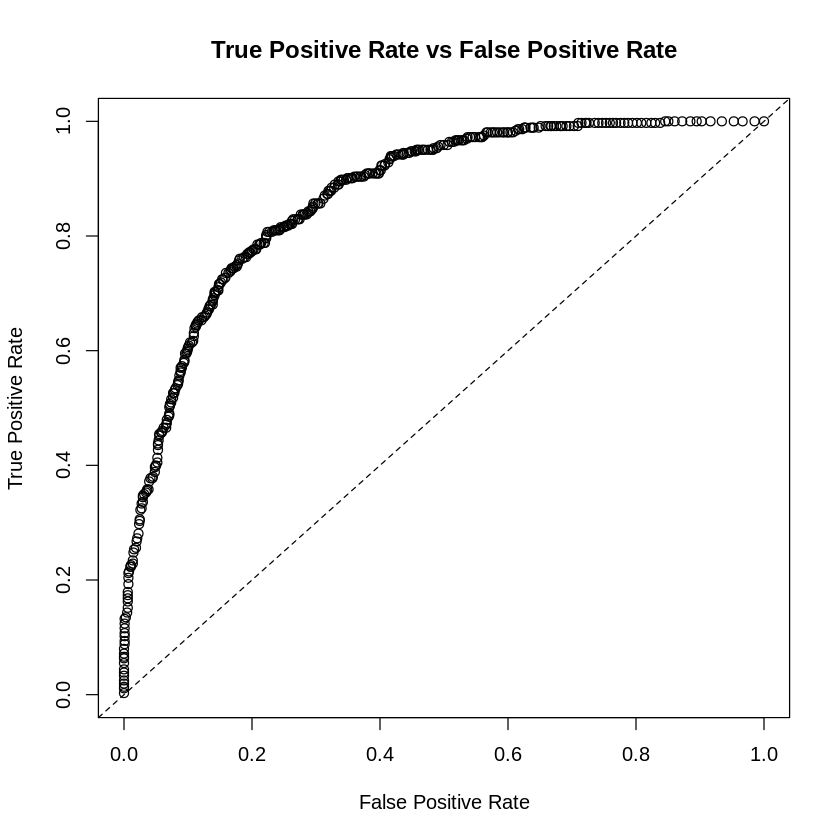

In [48]:
perf <- h2o.performance(dl_model, newdata = test)
plot(perf)

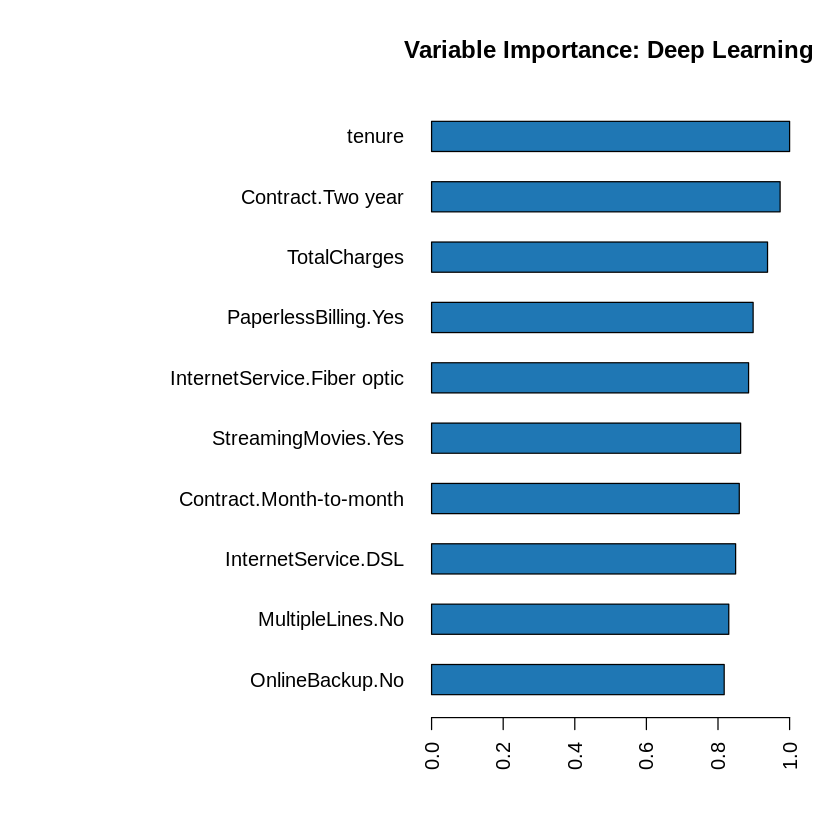

In [54]:
h2o.varimp_plot(dl_model)


In [55]:
dl_model <- h2o.deeplearning(x = hf_X,
                             y = hf_y,
                             training_frame = hf,
                             activation = "RectifierWithDropout",
                             hidden = c(100, 80, 100),
                             hidden_dropout_ratios = c(0.2, 0.2, 0.2),
                             loss = "CrossEntropy",
                             epochs = 2000,
                             rate = 0.005,
                             adaptive_rate = TRUE,
                             momentum_start = 0.5,
                             momentum_ramp = 100,
                             momentum_stable = 0.99,
                             nesterov_accelerated_gradient = TRUE,
                             l1 = 0,
                             l2 = 0,
                            validation_frame=valid)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“momentum_start cannot be specified if adaptive_rate is enabled..
momentum_ramp cannot be specified if adaptive_rate is enabled..
momentum_stable cannot be specified if adaptive_rate is enabled..
”

  |======================================================================| 100%


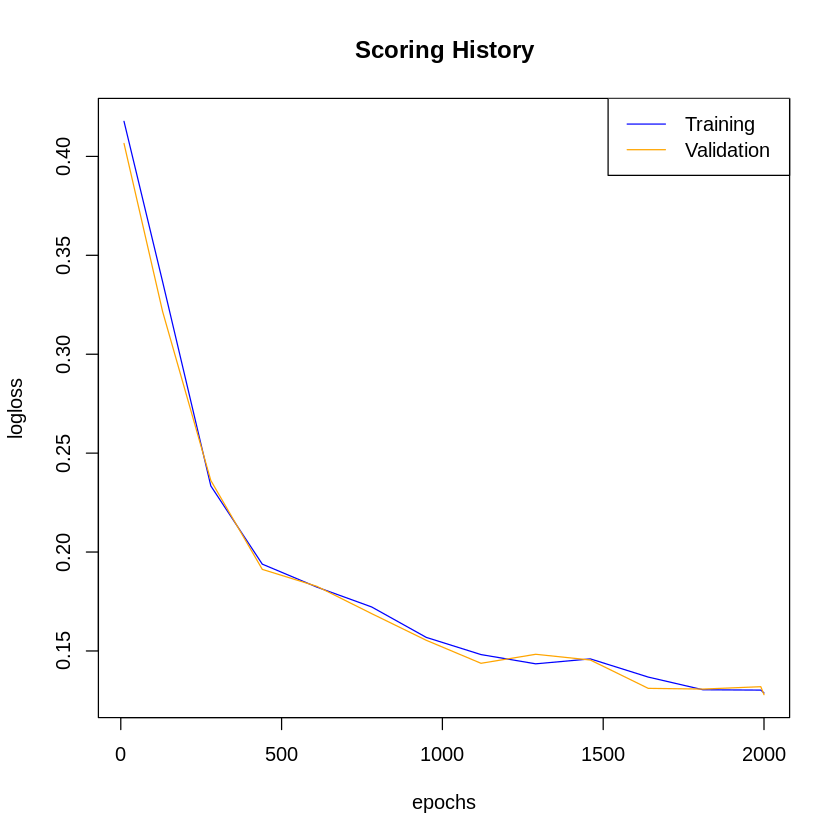

In [56]:
plot(dl_model)

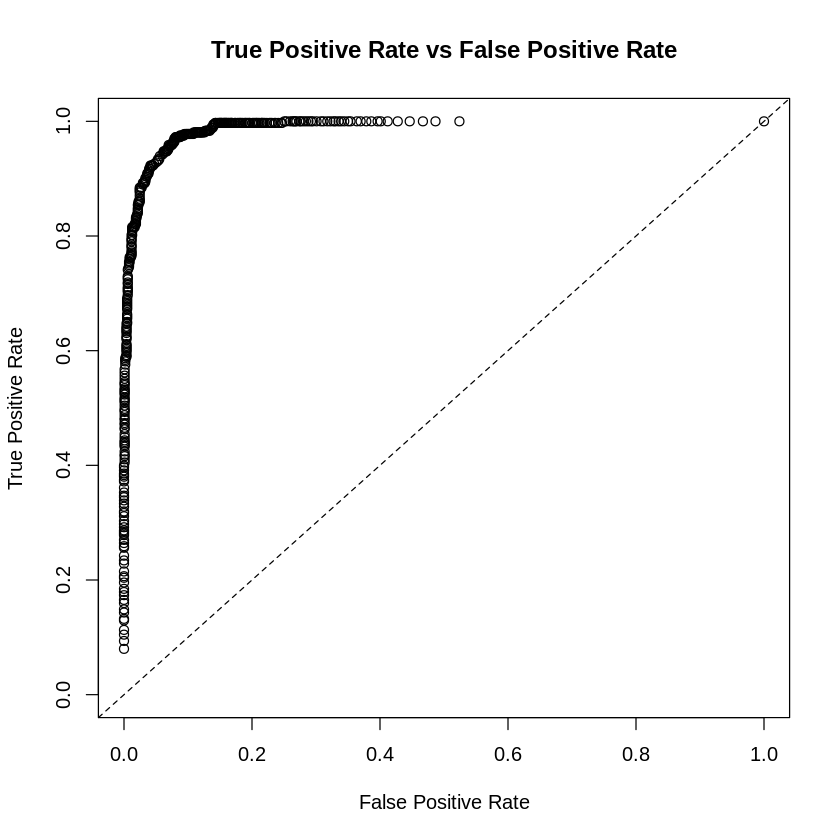

In [57]:
perf <- h2o.performance(dl_model, newdata = test)
plot(perf)

In [71]:
path <- h2o.saveModel(dl_model,  path="./mybestmodel",force=TRUE)

In [64]:
getwd()

[1] "/home/jovyan/mayo_jovyan/mensch/my r course/lecture 3"

In [73]:
#m_loaded <- h2o.loadModel(path="./mybestmodel")
#summary(m_loaded)

In [ ]:
#http://docs.h2o.ai/h2o-tutorials/latest-stable/tutorials/deeplearning/index.html
Hyper-parameter Tuning with Grid Search
Checkpointing
Cross-Validation
Unsupervised Anomaly detection
Exporting Weights and Biases



In [ ]:
h2o.shutdown(prompt=FALSE)

In [58]:
save.image("dl.RData")